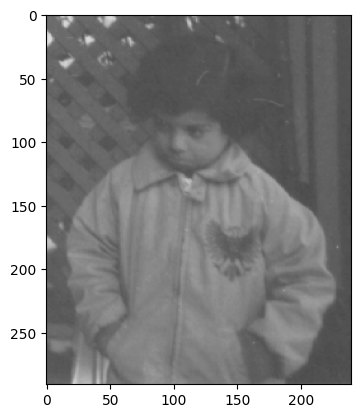

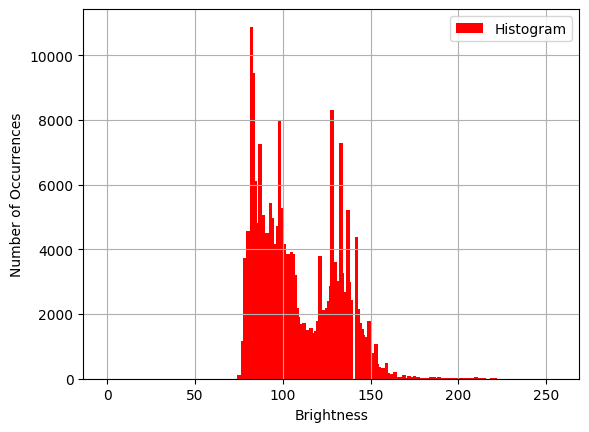

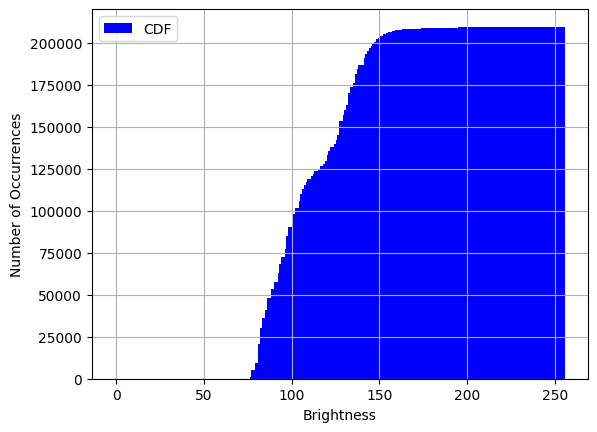

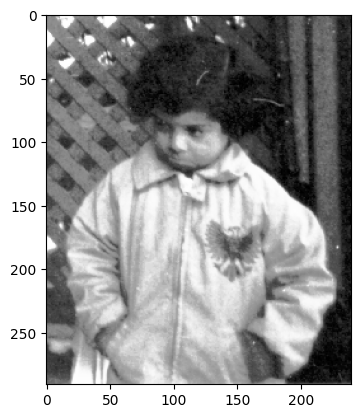

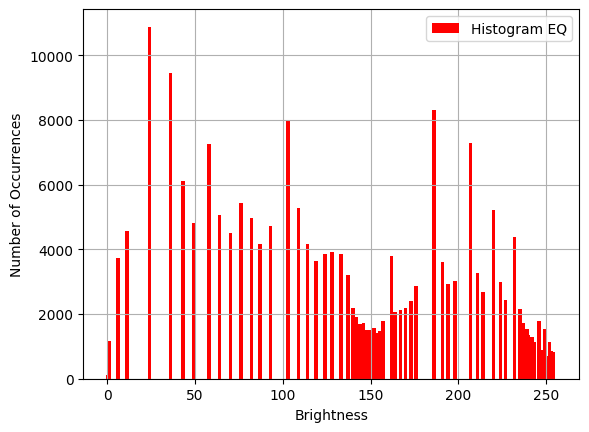

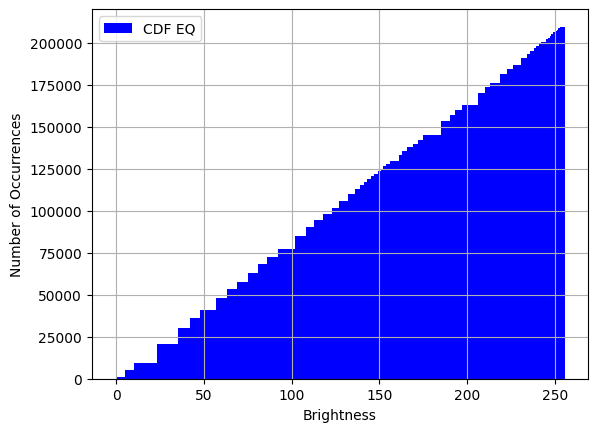

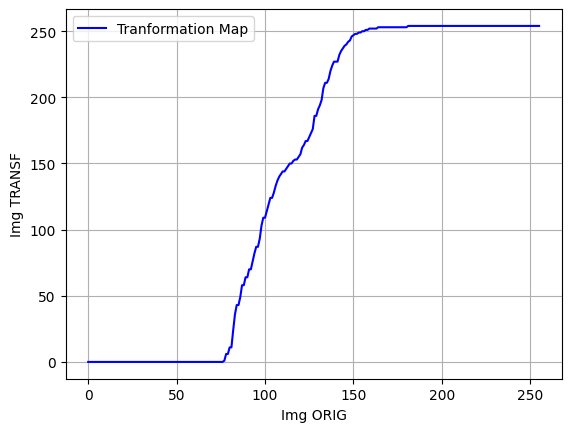

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pout/pout.tif")

imgArray = np.asarray(img)

imgHist = np.bincount(imgArray.flatten(), minlength=256)
qtdPixels = np.sum(imgHist)

imgHistProb = imgHist/qtdPixels

imgHistCum = np.cumsum(imgHist)
imgHistProbCum = np.cumsum(imgHistProb)

imgTransfMap = np.floor(255*imgHistProbCum).astype(np.uint8)

imgTransfList = list(imgArray.flatten())

imgEqList = [imgTransfMap[i] for i in imgTransfList]

imgEqHist = np.bincount(imgEqList, minlength=256)

imgEqHistCum = np.cumsum(imgEqHist)

imgEq = np.reshape(np.asarray(imgEqList), imgArray.shape)

plt.figure(num=1)
plt.imshow(img)

plt.figure(num=2)
plt.bar(np.arange(256), imgHist, width=2, bottom=None, align='center', label='Histogram', color='red')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show() 

plt.figure(num=3)
plt.bar(np.arange(256), imgHistCum, width=2, bottom=None, align='center', label='CDF', color='blue')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show()

plt.figure(num=4)
plt.imshow(imgEq)

plt.figure(num=5)
plt.bar(np.arange(256), imgEqHist, width=2, bottom=None, align='center', label='Histogram EQ', color='red')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show() 

plt.figure(num=6)
plt.bar(np.arange(256), imgEqHistCum, width=2, bottom=None, align='center', label='CDF EQ', color='blue')
plt.ylabel('Number of Occurrences')
plt.xlabel('Brightness')
plt.grid(which="both")
plt.legend()
plt.show()

plt.figure(num=7)
plt.plot(np.arange(256), imgTransfMap, 'b', label='Tranformation Map')
plt.ylabel('Img TRANSF')
plt.xlabel('Img ORIG')
plt.grid(which="both")
plt.legend()
plt.show()